In [1]:
from pandas.tseries.offsets import BDay
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import alphalens
import csv

# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/Users/brad_sun/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import Accern dataset example:
io_file = '3_27_testing_sp500_for_2018.csv'
data_path = '/Users/brad_sun/Downloads/accern/accern_data/'
raw = pd.read_csv(data_path+io_file)

# 1. Exploratory Data Analysis

In [5]:
raw.shape

(37469, 8)

In [9]:
raw.day

0        2018-01-01T00:00:00.000-05
1        2018-01-01T00:00:00.000-05
2        2018-01-01T00:00:00.000-05
3        2018-01-01T00:00:00.000-05
4        2018-01-01T00:00:00.000-05
5        2018-01-01T00:00:00.000-05
6        2018-01-01T00:00:00.000-05
7        2018-01-01T00:00:00.000-05
8        2018-01-01T00:00:00.000-05
9        2018-01-01T00:00:00.000-05
10       2018-01-01T00:00:00.000-05
11       2018-01-01T00:00:00.000-05
12       2018-01-01T00:00:00.000-05
13       2018-01-01T00:00:00.000-05
14       2018-01-01T00:00:00.000-05
15       2018-01-01T00:00:00.000-05
16       2018-01-01T00:00:00.000-05
17       2018-01-01T00:00:00.000-05
18       2018-01-01T00:00:00.000-05
19       2018-01-01T00:00:00.000-05
20       2018-01-01T00:00:00.000-05
21       2018-01-01T00:00:00.000-05
22       2018-01-01T00:00:00.000-05
23       2018-01-01T00:00:00.000-05
24       2018-01-01T00:00:00.000-05
25       2018-01-01T00:00:00.000-05
26       2018-01-01T00:00:00.000-05
27       2018-01-01T00:00:00

Data cleaning

In [15]:
raw.columns

Index(['day', 'entity_ticker', 'avg_entity_relevance', 'avg_entity_sentiment',
       'avg_entity_source_timeliness_score', 'avg_event_sentiment',
       'avg_story_group_traffic_sum', 'num_story_sentiment'],
      dtype='object')

In [29]:
all_columns = raw.columns
col_value = {}
for col in all_columns:
    col_value[col] = len(raw[col].dropna())

In [40]:
list(col_value.values())

[37469, 37469, 37469, 36555, 36909, 37418, 37469, 37469]

In [41]:
list(col_value.keys())

['day',
 'entity_ticker',
 'avg_entity_relevance',
 'avg_entity_sentiment',
 'avg_entity_source_timeliness_score',
 'avg_event_sentiment',
 'avg_story_group_traffic_sum',
 'num_story_sentiment']

In [47]:
testingdf = pd.DataFrame(list(col_value.values()), index = list(col_value.keys()), columns=['Non_Null_Length'])

In [72]:
testingdf

,Non_Null_Length
day,37469
entity_ticker,37469
avg_entity_relevance,37469
avg_entity_sentiment,36555
avg_entity_source_timeliness_score,36909
avg_event_sentiment,37418
avg_story_group_traffic_sum,37469
num_story_sentiment,37469


In [74]:
testingdf.Non_Null_Length.value_counts()

37469    5
37418    1
36555    1
36909    1
Name: Non_Null_Length, dtype: int64

In [65]:
# This can be added into QA:
def column_stats(df):
    print ('Total length of the dataframe :', len(df))
    all_columns = df.columns
    col_value = {}
    for col in all_columns:
        col_value[col] = len(df[col].dropna())
    new_df = pd.DataFrame(list(col_value.values()), index = list(col_value.keys()), columns=['Non_Null_Length'])
    new_df.plot.bar(figsize = (12, 4))
    plt.legend(loc="best")
    return new_df

Total length of the dataframe : 37469


,Non_Null_Length
day,37469
entity_ticker,37469
avg_entity_relevance,37469
avg_entity_sentiment,36555
avg_entity_source_timeliness_score,36909
avg_event_sentiment,37418
avg_story_group_traffic_sum,37469
num_story_sentiment,37469


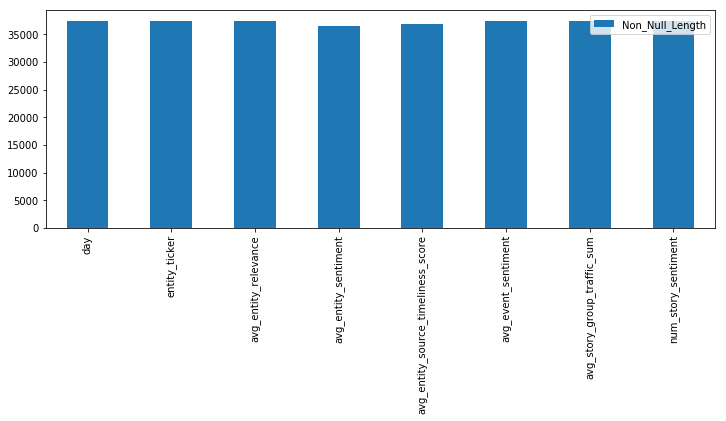

In [64]:
column_stats(raw)

# 2. Distributions

In [11]:
raw_test = raw.copy()

In [13]:
raw_test['new_tested_signal'] = raw_test['avg_entity_relevance']+ raw_test['avg_entity_source_timeliness_score']

In [14]:
raw_test

,day,entity_ticker,avg_entity_relevance,avg_entity_sentiment,avg_entity_source_timeliness_score,avg_event_sentiment,avg_story_group_traffic_sum,num_story_sentiment,new_tested_signal
0,2018-01-01T00:00:00.000-05,AAL,100.000000,9.472727,25.899845,14.354545,2.728801e+07,11,125.899845
1,2018-01-01T00:00:00.000-05,AAP,98.000000,13.300000,4.500000,13.380000,9.025860e+06,5,102.500000
2,2018-01-01T00:00:00.000-05,AAPL,100.000000,12.961905,40.828789,7.540385,1.590902e+10,25,140.828789
3,2018-01-01T00:00:00.000-05,ABBV,100.000000,-7.936842,52.030147,-4.524737,3.244246e+05,19,152.030147
4,2018-01-01T00:00:00.000-05,ABT,100.000000,-24.706667,12.699814,-18.638824,2.659531e+06,17,112.699814
5,2018-01-01T00:00:00.000-05,ACN,100.000000,77.466667,38.520025,73.775000,9.721887e+05,6,138.520025
6,2018-01-01T00:00:00.000-05,ADBE,100.000000,61.371429,50.812100,59.971429,1.179835e+06,7,150.812100
7,2018-01-01T00:00:00.000-05,ADI,100.000000,-27.650000,8.857267,1.562500,9.694236e+07,8,108.857267
8,2018-01-01T00:00:00.000-05,ADP,100.000000,57.600000,NaN,45.733333,1.160837e+06,6,NaN
9,2018-01-01T00:00:00.000-05,ADS,100.000000,-87.300000,NaN,-87.500000,2.297626e+06,1,NaN


# Probability Mass Functions

# 4. Cumulative Distribution Functions

# 5. Modeling Distributions

# 6. Probability Density Functions

# 7. Relationships Between Variables

# 8. Estimation

# 9. Hypothesis Testing

# 10. Linear Least Squares

# 11. Regressions

# 12. Time Series Analysis

# 13. Survival Analysis

# 14. Analyticla Methods